In [1]:
import os
import numpy as np
import matplotlib
import pandas as pd
from matplotlib import pyplot as plt
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
import seaborn as sns
sns.set_style('white')
import dataframe_image as dfi
import pickle
from network_setup import *
from data_setup import *

from EnergyCommunityModel import *
from model_eval import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

# set up home path
#home_path = os.getcwd()

In [2]:
# set up simulation scope
input_cdir_timestamp = '2022 11 09 10h46m56s'
with open('2022_11_13_filepaths.pickle', 'rb') as handle:
    paths = pickle.load(handle)
date_t = '2022 12 16 20h00m'
n_steps = 96*7

# define comprehensive scenario settings for analysis
scenario_sc0 = {'seasons': ['summer', 'winter'], 'p2p_options': [False], 'pr_years': [2019, 2022], 'pr_dynamic_options': [False]}
scenario_sc1 = {'seasons': ['summer', 'winter'], 'p2p_options': [False], 'pr_years': [2019, 2022], 'pr_dynamic_options': [True]}
scenario_sc2 = {'seasons': ['summer', 'winter'], 'p2p_options': [True], 'pr_years': [2019, 2022], 'pr_dynamic_options': [True]}
scenario_dict = {'scenario_0': scenario_sc0, 'scenario_1': scenario_sc1, 'scenario_2': scenario_sc2}

# manually define all scenarios
scenario_0 = {'seasons': ['summer'], 'p2p_options': [False], 'pr_years': [2019], 'pr_dynamic_options': [False]}
scenario_1 = {'seasons': ['winter'], 'p2p_options': [False], 'pr_years': [2019], 'pr_dynamic_options': [False]}
scenario_2 = {'seasons': ['summer'], 'p2p_options': [False], 'pr_years': [2022], 'pr_dynamic_options': [False]}
scenario_3 = {'seasons': ['winter'], 'p2p_options': [False], 'pr_years': [2022], 'pr_dynamic_options': [False]}

scenario_4 = {'seasons': ['summer'], 'p2p_options': [False], 'pr_years': [2019], 'pr_dynamic_options': [True]}
scenario_5 = {'seasons': ['winter'], 'p2p_options': [False], 'pr_years': [2019], 'pr_dynamic_options': [True]}
scenario_6 = {'seasons': ['summer'], 'p2p_options': [False], 'pr_years': [2022], 'pr_dynamic_options': [True]}
scenario_7 = {'seasons': ['winter'], 'p2p_options': [False], 'pr_years': [2022], 'pr_dynamic_options': [True]}

scenario_8 = {'seasons': ['summer'], 'p2p_options': [True], 'pr_years': [2019], 'pr_dynamic_options': [True]}
scenario_9 = {'seasons': ['winter'], 'p2p_options': [True], 'pr_years': [2019], 'pr_dynamic_options': [True]}
scenario_10 = {'seasons': ['summer'], 'p2p_options': [True], 'pr_years': [2022], 'pr_dynamic_options': [True]}
scenario_11 = {'seasons': ['winter'], 'p2p_options': [True], 'pr_years': [2022], 'pr_dynamic_options': [True]}
all_scs = [scenario_0, scenario_4, scenario_8, scenario_1, scenario_5, scenario_9, scenario_2, scenario_6, scenario_10, scenario_3, scenario_7, scenario_11]

---

In [13]:
# 11
batch_runner(paths, sc_dict=scenario_11, n_steps=n_steps, input_cdir_timestamp=input_cdir_timestamp, output_dir_timestamp=date_t)

---

In [ ]:
# plot p2p price level
l = mdf.price_n_level.tolist()
ind = mdf.index
dfs = []
for i in range(6):
    dfs.append(pd.DataFrame([j[i] for j in l], index=ind))
df = pd.concat(dfs, axis=1)
df.columns = ['price g_s', 'price_n_d (1)', 'price_n_d (2)', 'price_n_d (3)', 'price_n_d (4)', 'price g_d']

fig, ax = plt.subplots(figsize = (22,6))
df.plot(ax = ax, title='P2P trading price level (ct/kWh), summer 2022', color = ['blue', 'grey', 'grey','grey','grey', 'black'])
ax.set_ylabel('ct/kWh')
plt.tight_layout()
plt.show()

---

In [17]:
sc_dict, measure = all_scs, 'welfare'
df = get_quick_measure_kpis(paths, date_t, scenarios = sc_dict, measure = measure)
np.round(df, 2)

,year,season,price,p2p,use case,total_costs_all,total_costs_prosumer,total_costs_consumer,mean_gini
sc0,2019,summer,static,disabled,"uc_1: static prices, no p2p trading",-9701.835946,-22470.212275,12768.376329,0.676686
sc1,2019,summer,dynamic,disabled,"uc_2: dynamic prices, no p2p trading",-10407.758106,-22476.353013,12068.594907,0.656174
sc2,2019,summer,dynamic,enabled,"uc_3: dynamic prices, p2p trading",-12292.010481,-24307.679507,12015.669025,0.656489
sc3,2019,winter,static,disabled,"uc_1: static prices, no p2p trading",6401.685978,-6654.980249,13056.666227,0.567819
sc4,2019,winter,dynamic,disabled,"uc_2: dynamic prices, no p2p trading",5617.29523,-7046.423116,12663.718346,0.558126
sc5,2019,winter,dynamic,enabled,"uc_3: dynamic prices, p2p trading",4459.963356,-8142.977327,12602.940684,0.562082
sc6,2022,summer,static,disabled,"uc_1: static prices, no p2p trading",853.982288,-22446.615613,23300.597901,0.679167
sc7,2022,summer,dynamic,disabled,"uc_2: dynamic prices, no p2p trading",-676.368955,-22448.518689,21772.149734,0.651378
sc8,2022,summer,dynamic,enabled,"uc_3: dynamic prices, p2p trading",-4195.792567,-25633.233589,21437.441022,0.649635
sc9,2022,winter,static,disabled,"uc_1: static prices, no p2p trading",14162.493037,-5491.606116,19654.099152,0.555202


In [20]:
df_temp = df.groupby(['use case'])['total_costs_all'].mean().reset_index()
df_temp

,use case,total_costs_all
0,"uc_1: static prices, no p2p trading",2929.081339
1,"uc_2: dynamic prices, no p2p trading",1620.118488
2,"uc_3: dynamic prices, p2p trading",-260.941401


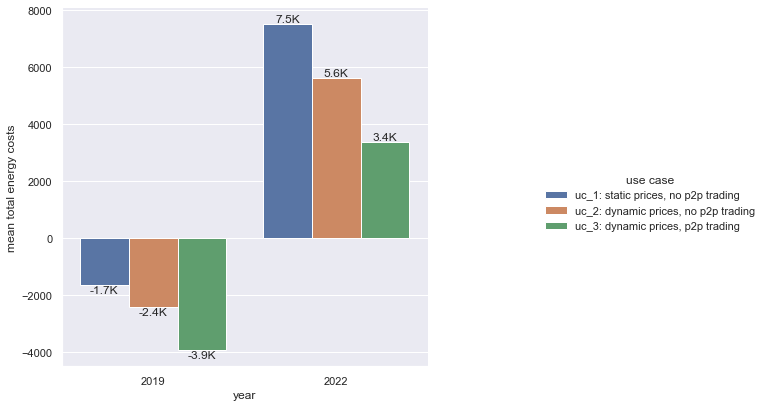

In [ ]:
df_temp = df.groupby(['year', 'use case'])['total_costs_all'].mean().reset_index(name='mean total energy costs')

g = sns.catplot(data=df_temp, y='mean total energy costs', x='year', hue='use case', kind='bar')
g.fig.set_size_inches(12,6)
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)
# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

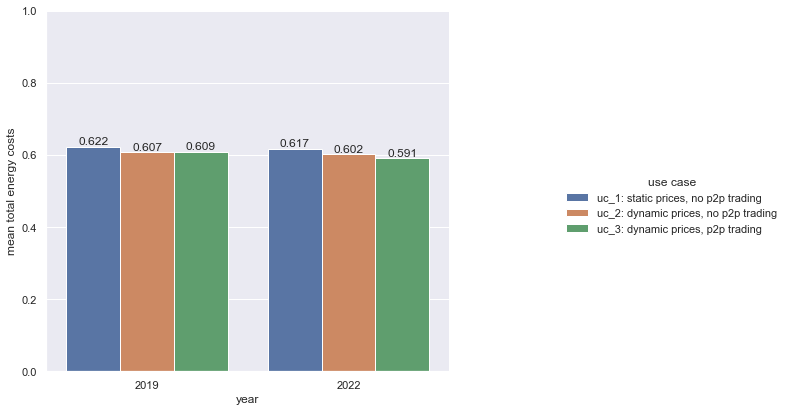

In [ ]:
df_temp = df.groupby(['year', 'use case'])['mean_gini'].mean().reset_index(name='mean total energy costs')

g = sns.catplot(data=df_temp, y='mean total energy costs', x='year', hue='use case', kind='bar')
g.fig.set_size_inches(12,6)
g.ax.set_ylim(0,1)
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)
# iterate through the axes containers
for c in ax.containers:
    labels = [f'{round(v.get_height(),3)}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

In [ ]:
sc_dict, measure = all_scs, 'stability'
df = get_quick_measure_kpis(paths, date_t, scenarios = sc_dict, measure = measure)
np.round(df, 2)

,year,season,price,p2p,use case,total_net_grid_demand,mean_net_grid_demand,std_net_grid_demand
sc0,2019,summer,static,disabled,"uc_1: static prices, no p2p trading",-2720.538804,-4.048421,6.684184
sc1,2019,summer,dynamic,disabled,"uc_2: dynamic prices, no p2p trading",-2750.976945,-4.093716,6.764339
sc2,2019,summer,dynamic,enabled,"uc_3: dynamic prices, p2p trading",-2762.311289,-4.110582,6.746116
sc3,2019,winter,static,disabled,"uc_1: static prices, no p2p trading",-659.655025,-0.98163,4.758316
sc4,2019,winter,dynamic,disabled,"uc_2: dynamic prices, no p2p trading",-691.764769,-1.029412,4.900545
sc5,2019,winter,dynamic,enabled,"uc_3: dynamic prices, p2p trading",-693.155406,-1.031481,4.895916
sc6,2022,summer,static,disabled,"uc_1: static prices, no p2p trading",-2712.678727,-4.036724,6.683525
sc7,2022,summer,dynamic,disabled,"uc_2: dynamic prices, no p2p trading",-2724.149067,-4.053793,6.407184
sc8,2022,summer,dynamic,enabled,"uc_3: dynamic prices, p2p trading",-2503.098005,-3.724848,7.184609
sc9,2022,winter,static,disabled,"uc_1: static prices, no p2p trading",-668.59173,-0.994928,4.740537


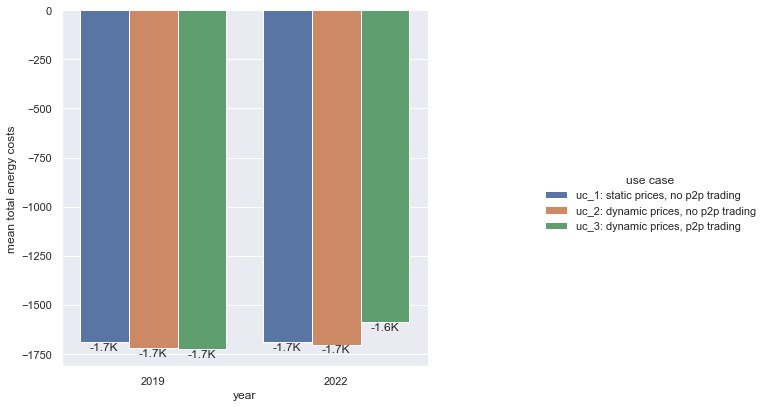

In [ ]:
df_temp = df.groupby(['year', 'use case'])['total_net_grid_demand'].mean().reset_index(name='mean total energy costs')
g = sns.catplot(data=df_temp, y='mean total energy costs', x='year', hue='use case', kind='bar')
g.fig.set_size_inches(12,6)
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)
# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

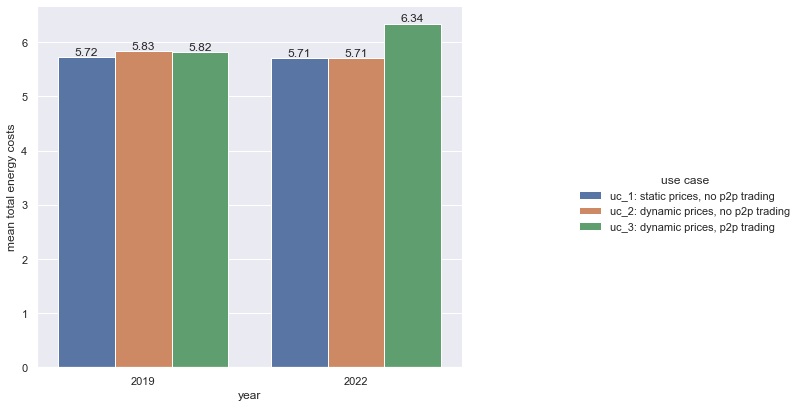

In [ ]:
df_temp = df.groupby(['year', 'use case'])['std_net_grid_demand'].mean().reset_index(name='mean total energy costs')
g = sns.catplot(data=df_temp, y='mean total energy costs', x='year', hue='use case', kind='bar')
g.fig.set_size_inches(12,6)
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)
# iterate through the axes containers
for c in ax.containers:
    labels = [f'{round(v.get_height(),2)}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

In [ ]:
sc_dict, measure = all_scs, 'sustainability'
df = get_quick_measure_kpis(paths, date_t, scenarios = sc_dict, measure = measure)
np.round(df, 2)

,year,season,price,p2p,use case,total kgCO2e_all,total_kgCO2e_prosumer,total_kgCO2e_consumer,mean_CO2e_gini
sc0,2019,summer,static,disabled,"uc_1: static prices, no p2p trading",441.691759,216.708047,224.983711,0.357749
sc1,2019,summer,dynamic,disabled,"uc_2: dynamic prices, no p2p trading",428.395697,216.848239,211.547458,0.336888
sc2,2019,summer,dynamic,enabled,"uc_3: dynamic prices, p2p trading",363.19618,218.54192,144.65426,0.393226
sc3,2019,winter,static,disabled,"uc_1: static prices, no p2p trading",379.068357,140.719323,238.349034,0.27295
sc4,2019,winter,dynamic,disabled,"uc_2: dynamic prices, no p2p trading",357.946838,133.2982,224.648638,0.257631
sc5,2019,winter,dynamic,enabled,"uc_3: dynamic prices, p2p trading",314.571479,135.549116,179.022363,0.255832
sc6,2022,summer,static,disabled,"uc_1: static prices, no p2p trading",442.93207,216.94682,225.98525,0.351701
sc7,2022,summer,dynamic,disabled,"uc_2: dynamic prices, no p2p trading",419.108085,217.07357,202.034515,0.326964
sc8,2022,summer,dynamic,enabled,"uc_3: dynamic prices, p2p trading",365.064443,227.695652,137.368791,0.391866
sc9,2022,winter,static,disabled,"uc_1: static prices, no p2p trading",359.131422,142.555011,216.576412,0.282208


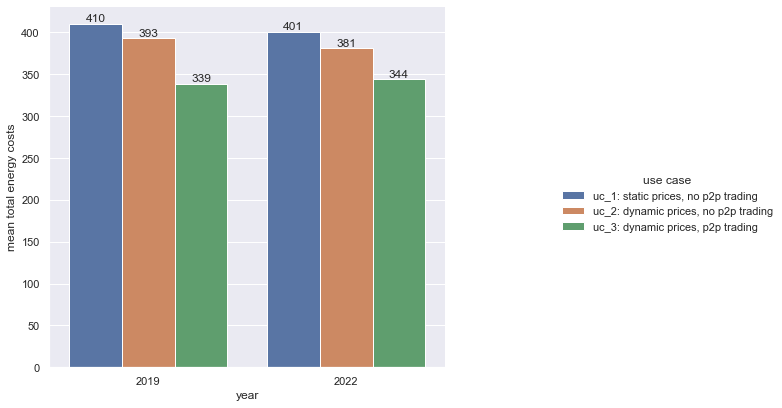

In [ ]:
df_temp = df.groupby(['year', 'use case'])['total kgCO2e_all'].mean().reset_index(name='mean total energy costs')
g = sns.catplot(data=df_temp, y='mean total energy costs', x='year', hue='use case', kind='bar')
g.fig.set_size_inches(12,6)
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)
# iterate through the axes containers
for c in ax.containers:
    labels = [f'{round(v.get_height())}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

,"sc0: 2022, winter","sc1: 2022, winter","sc2: 2022, winter"
total kgCO2e_all,359.13,342.61,323.39
total_kgCO2e_prosumer,142.56,137.68,156.21
total_kgCO2e_consumer,216.58,204.93,167.18
mean_CO2e_gini,0.28,0.27,0.28


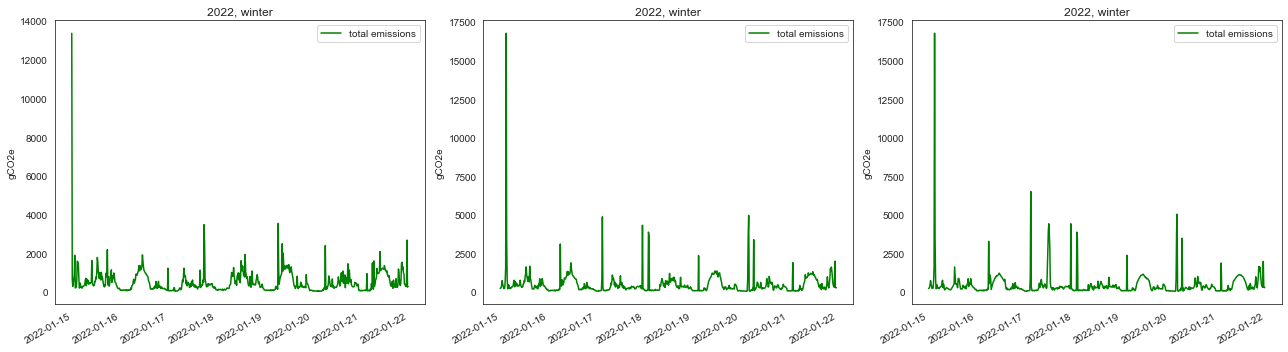

In [ ]:
sc_dict, measure = [scenario_3, scenario_7, scenario_11], 'sustainability'
fig = plot_three_scenarios(paths, date_t, scenarios=sc_dict, measure=measure)
df = get_quick_measure_kpis(paths, date_t, scenarios = sc_dict, measure = measure)
np.round(df,2)

,"sc0: 2022, winter","sc1: 2022, winter","sc2: 2022, winter"
total kgCO2e_all,339.165166,331.764519,312.962218
total_kgCO2e_prosumer,132.868818,134.090247,153.045661
total_kgCO2e_consumer,206.296347,197.674272,159.916557
mean_CO2e_gini,0.273544,0.265406,0.276222


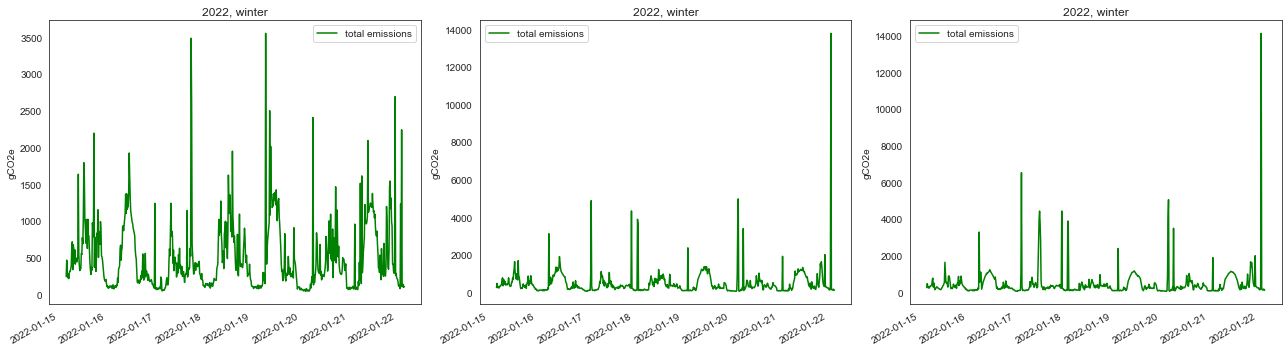

In [ ]:
sc_dict, measure = [scenario_3, scenario_7, scenario_11], 'sustainability'
fig = plot_three_scenarios(paths, date_t, scenarios=sc_dict, measure=measure)
df = get_quick_measure_kpis(paths, date_t, scenarios = sc_dict, measure = measure)
df

In [ ]:
mdf = get_quick_mdf(paths, date_t, scenario_dict_sc=scenario_11)
df = calculate_stability_measures(mdf)
df

,net_grid_demand,autarky_level
count,672.00,672.00
mean,-1.01,2.82
std,5.17,8.65
max,31.13,50.81
sum,-680.81,0.00


In [ ]:
# calculate certain measure for certain scenario and save df as png
m_dict = calculate_measure(paths, date_t, scenario_dict=scenario_2, measure='welfare')
#export_measure_calculation(paths, m_dict)

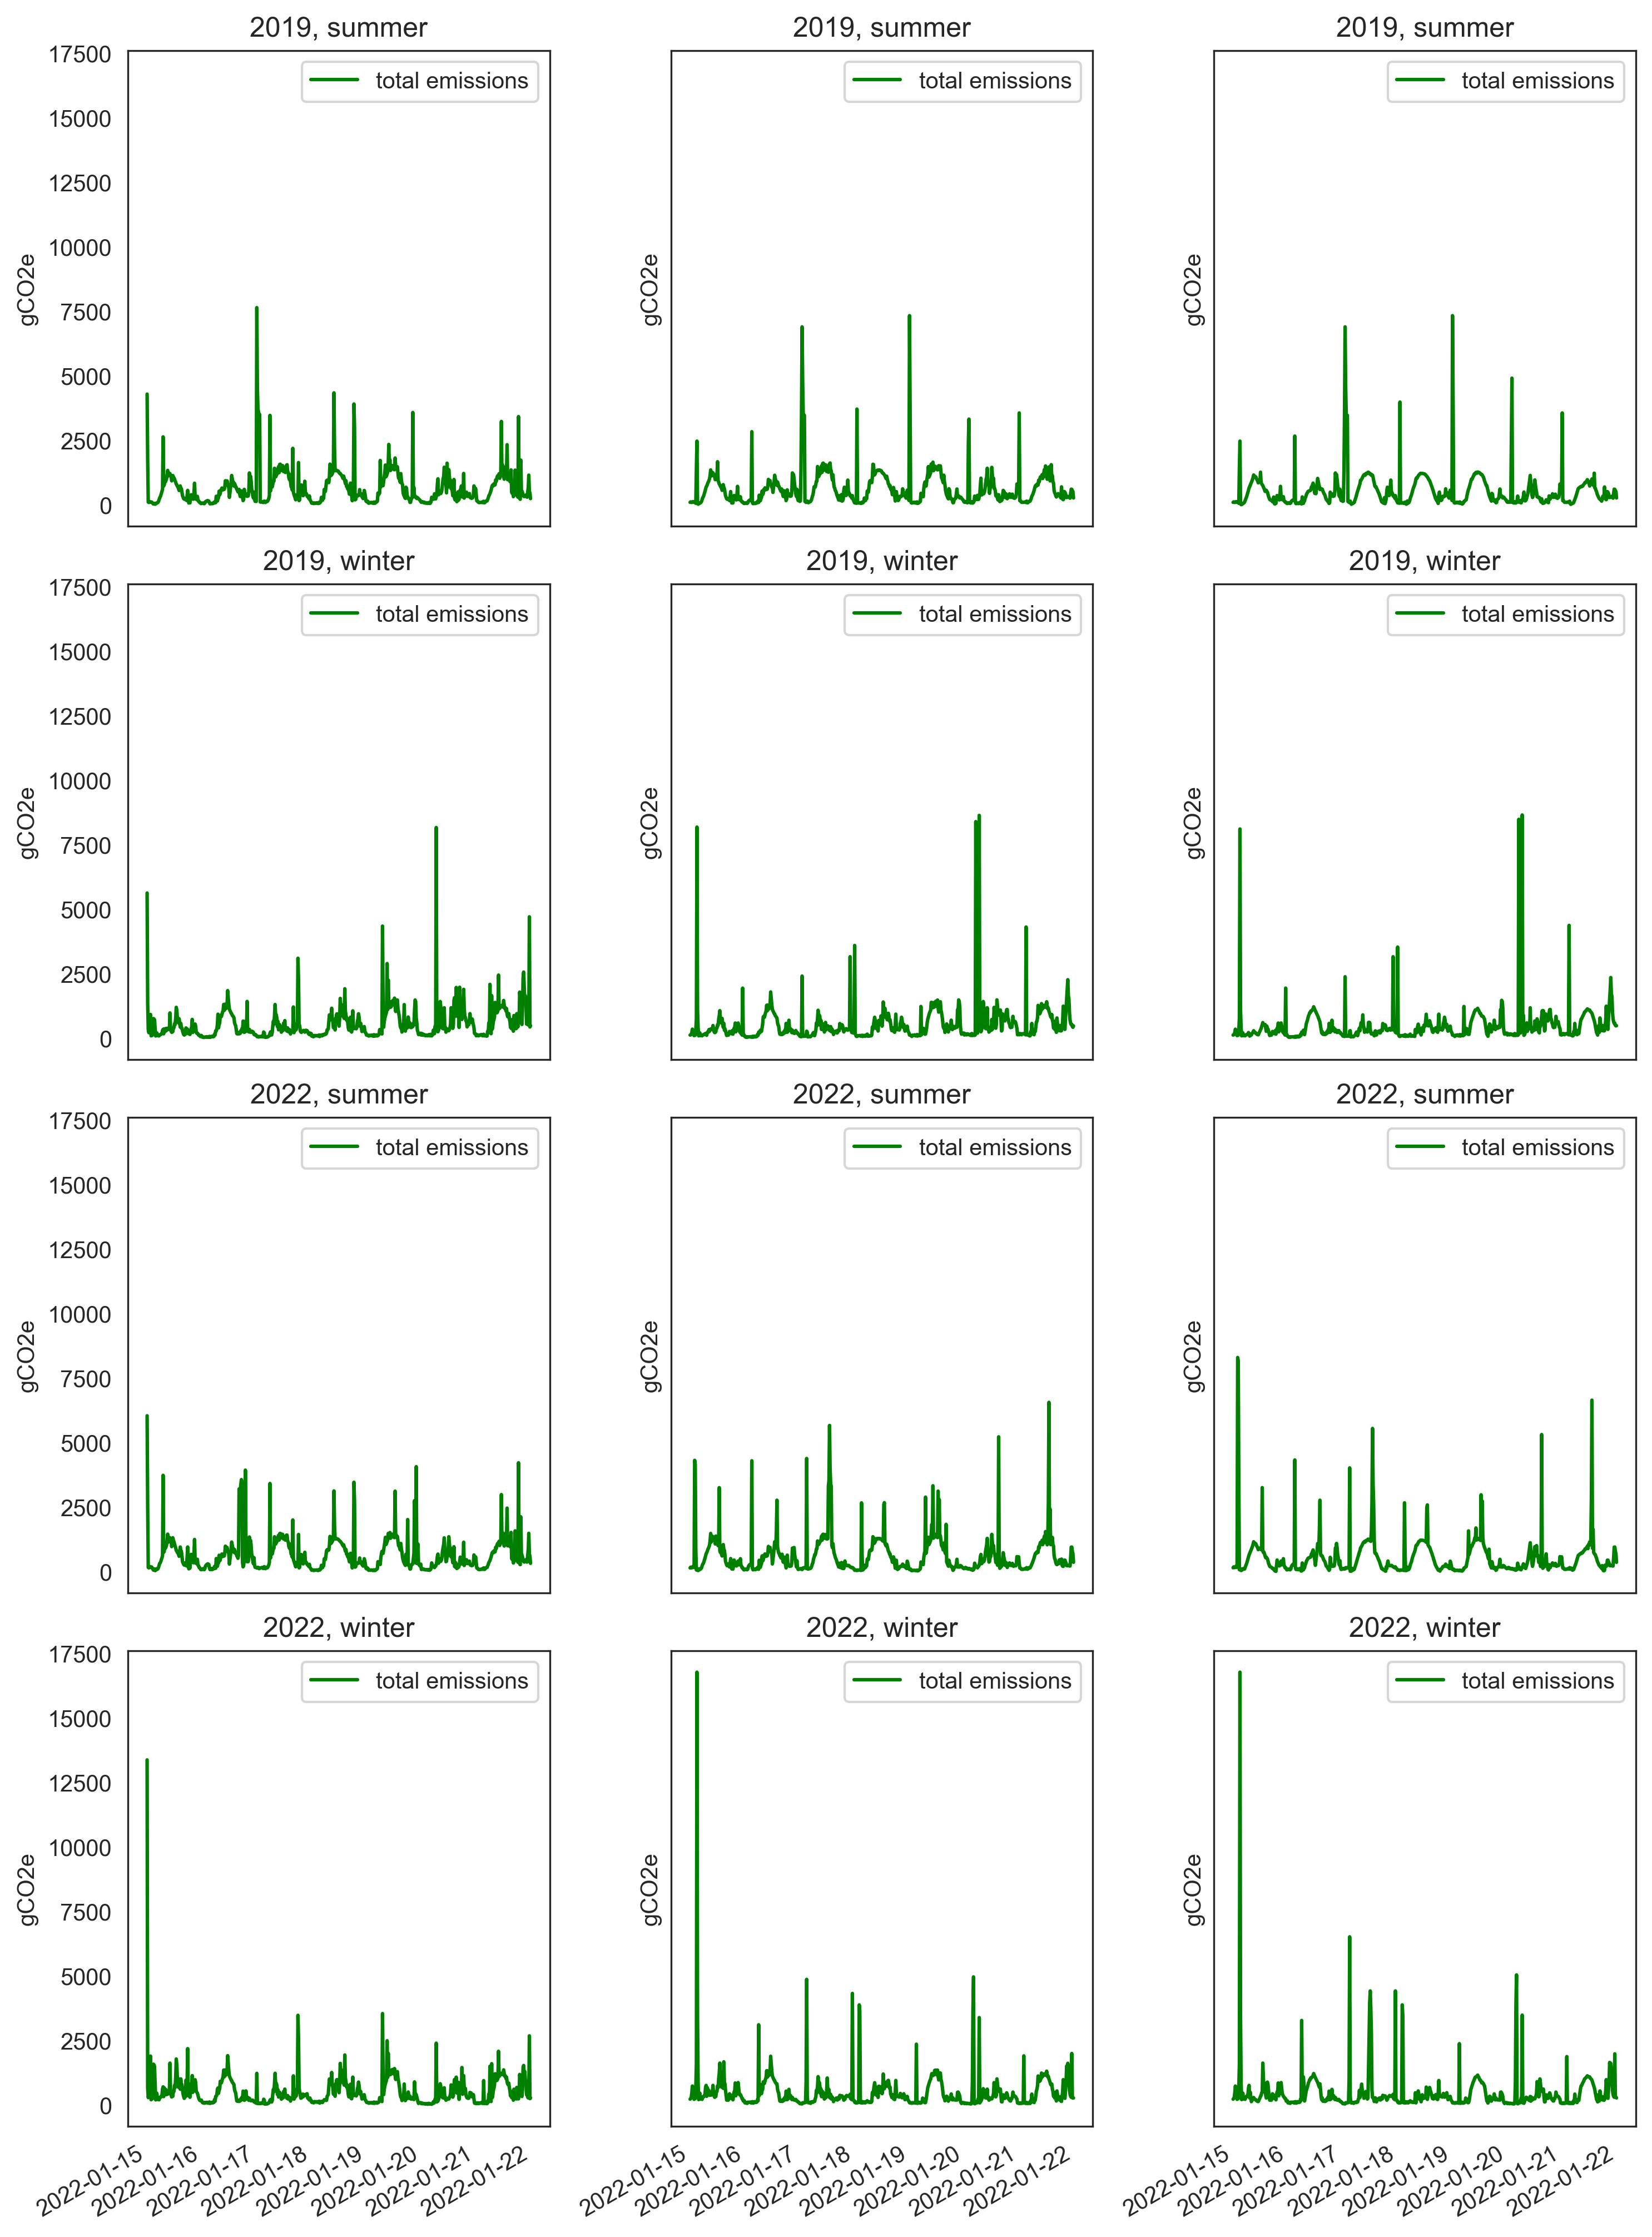

In [ ]:
fig, ax = plot_all_scenarios(paths, date_t, scenario_dict, measure='sustainability')
plt.gcf().set_dpi(300)